In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

iris = load_iris()

x = iris.data
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
c_knn = KNeighborsClassifier(n_neighbors=3)
c_knn.fit(x_train,y_train)
y_pred = c_knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
sample = [[2,2,2,2]]
pred = c_knn.predict(sample)
pred_v = [iris.target_names[p] for p in pred]
print(pred_v)

Accuracy: 0.9777777777777777
['setosa']


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
x,y = load_iris(return_X_y=True)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.5,random_state=0)
gnb = GaussianNB()
ypred = gnb.fit(xtrain,ytrain).predict(xtest)
print(ypred)
xnew = [[5,5,4,4]]
ynew = gnb.fit(xtrain,ytrain).predict(xnew)
print("Predicted Output for [[5,5,4,4]]:", ynew)
print("Naive Bayes score:",gnb.score(xtest,ytest))

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]
Predicted Output for [[5,5,4,4]]: [2]
Naive Bayes score: 0.9466666666666667


(150, 4)
Classes to predict: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(150, 4)

(150,)

Accuracy on train data using Gini: 1.0
Accuracy on test data using Gini: 0.9473684210526315
Accuracy on train data using entropy: 1.0
Accuracy on test data using entropy: 0.9473684210526315
Accuracy on train data using entropy: 0.9642857142857143
Accuracy on test data using entropy: 0.9473684210526315


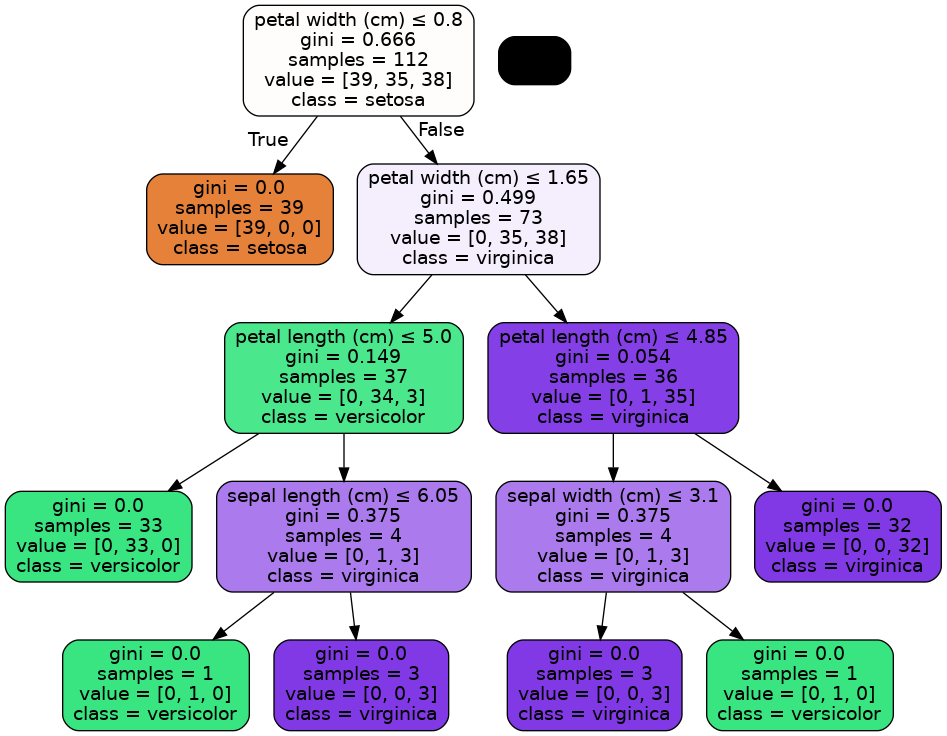

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()
print(data.data.shape)
print("Classes to predict:",data.target_names)
print("Features:",data.feature_names)
x = data.data
y = data.target
display(x.shape,y.shape)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=50,test_size=0.25)

#default criterion is Gini
classifier = DecisionTreeClassifier()
classifier.fit(xtrain,ytrain)
ypred = classifier.predict(xtest)

from sklearn.metrics import accuracy_score
print("Accuracy on train data using Gini:", accuracy_score(y_true=ytrain,y_pred=classifier.predict(xtrain)))
print("Accuracy on test data using Gini:", accuracy_score(y_true=ytest,y_pred=ypred))

#change criterion to entropy
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(xtrain,ytrain)
ypred_entropy = classifier_entropy.predict(xtest)
print("Accuracy on train data using entropy:", accuracy_score(y_true=ytrain,y_pred=classifier_entropy.predict(xtrain)))
print("Accuracy on test data using entropy:", accuracy_score(y_true=ytest,y_pred=ypred_entropy))

#change criterion to entropy with min_samples_split to 50. Default value is 2
classifier_entropy1 = DecisionTreeClassifier(criterion='entropy',min_samples_split=50)
classifier_entropy1.fit(xtrain,ytrain)
ypred_entropy1 = classifier_entropy1.predict(xtest)
print("Accuracy on train data using enhttp://localhost:8888/tropy:", accuracy_score(y_true=ytrain,y_pred=classifier_entropy1.predict(xtrain)))
print("Accuracy on test data using entropy:", accuracy_score(y_true=ytest,y_pred=ypred_entropy1))

#visualise the decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dotdata = StringIO()

#INCASE OF MODULE-MISSING ERRORS; DO FOLLOWING 2 STEPS;
#------CREATE NEW CELL -> TYPE AND RUN: pip install pydotplus   ------
#------OPEN NEW TERMINAL -> TYPE AND ENTER:  sudo apt-get install graphviz   ------


#the students can try using classifier, classifier_entropy & classifier_entropy1
#as first parameter below.
export_graphviz(classifier,out_file = dotdata,filled=True,rounded=True,special_characters=True,feature_names=data.feature_names,class_names=data.target_names)
graph = pydotplus.graph_from_dot_data(dotdata.getvalue())
Image(graph.create_png())